In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import random
import uuid

# Helper function to generate random dates
def random_date(start, end):
    delta = end - start
    random_days = random.randrange(delta.days)
    random_seconds = random.randrange(24 * 3600)
    return (start + timedelta(days=random_days, seconds=random_seconds)).strftime("%d/%m/%Y %H:%M")

# Chemical properties
chemicals = {
    'Ammonia': {'type': 'industrial chemical', 'LD50': 350, 'LC50': 200, 'IC50': 1.2, 'viscosity': 0.3, 'vapor_pressure': 8500, 'lethal_dosage': 3, 'threat_prob': {'low': 0.8, 'medium': 0.15, 'high': 0.05}},
    'Glyphosate': {'type': 'herbicide', 'LD50': 5600, 'LC50': 500, 'IC50': 2.5, 'viscosity': 1.7, 'vapor_pressure': 0.01, 'lethal_dosage': 10, 'threat_prob': {'low': 0.9, 'medium': 0.1, 'high': 0.0}},
    'Sarin': {'type': 'G-series nerve agent', 'LD50': 100, 'LC50': 75, 'IC50': 0.05, 'viscosity': 0.6, 'vapor_pressure': 2900, 'lethal_dosage': 0.5, 'threat_prob': {'low': 0.0, 'medium': 0.1, 'high': 0.9}},
    'VX': {'type': 'V-series nerve agent', 'LD50': 10, 'LC50': 30, 'IC50': 0.01, 'viscosity': 14, 'vapor_pressure': 10, 'lethal_dosage': 0.02, 'threat_prob': {'low': 0.0, 'medium': 0.05, 'high': 0.95}},
    'Malathion': {'type': 'pesticide', 'LD50': 1375, 'LC50': 210, 'IC50': 0.6, 'viscosity': 3.5, 'vapor_pressure': 1.78, 'lethal_dosage': 20, 'threat_prob': {'low': 0.2, 'medium': 0.75, 'high': 0.05}},
    'Urea': {'type': 'urea-based compound', 'LD50': 8471, 'LC50': 3000, 'IC50': 20, 'viscosity': 1.5, 'vapor_pressure': 0.01, 'lethal_dosage': 50, 'threat_prob': {'low': 0.95, 'medium': 0.05, 'high': 0.0}},
    'LSD': {'type': 'CNS-acting agent', 'LD50': 0.3, 'LC50': 0.1, 'IC50': 0.001, 'viscosity': 1.2, 'vapor_pressure': 0.01, 'lethal_dosage': 0.002, 'threat_prob': {'low': 0.0, 'medium': 0.1, 'high': 0.9}},
    'Soman': {'type': 'G-series nerve agent', 'LD50': 50, 'LC50': 50, 'IC50': 0.04, 'viscosity': 0.8, 'vapor_pressure': 2400, 'lethal_dosage': 0.4, 'threat_prob': {'low': 0.0, 'medium': 0.05, 'high': 0.95}}
}

# Other categorical options
incident_types = ['accident', 'intentional release', 'sabotage', 'test']
env_impacts = ['none', 'minimal', 'moderate', 'severe']
threat_levels = ['low', 'medium', 'high']
precipitation_options = ['yes', 'no']

# Generate dataset
np.random.seed(42)
n_rows = 2000
data = []
start_date = datetime(2023, 1, 1)
end_date = datetime(2025, 12, 31)

for _ in range(n_rows):
    chemical = random.choices(list(chemicals.keys()), weights=[0.2, 0.2, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1])[0]
    chem_props = chemicals[chemical]

    # Numerical features with noise
    latitude = np.random.uniform(-90, 90)
    longitude = np.random.uniform(-180, 180)
    quantity_released = np.random.lognormal(mean=5, sigma=1) if chem_props['type'] in ['industrial chemical', 'herbicide', 'urea-based compound', 'pesticide'] else np.random.lognormal(mean=3, sigma=0.5)
    quantity_released = min(max(quantity_released, 0), 1000)
    temperature = np.random.normal(20, 10)
    temperature = min(max(temperature, -20), 50)
    humidity = np.random.uniform(0, 100)
    wind_speed = np.random.lognormal(mean=2, sigma=0.5)
    wind_speed = min(max(wind_speed, 0), 20)
    wind_direction = np.random.uniform(0, 360)
    nearby_population = int(np.random.lognormal(mean=6, sigma=2))
    nearby_population = min(max(nearby_population, 0), 10000)
    proximity_sensitive_sites = np.random.uniform(0, 20)
    emergency_services_distance = np.random.uniform(0, 20)

    # Categorical features
    date_time = random_date(start_date, end_date)
    precipitation = random.choice(precipitation_options)
    incident_type = random.choices(incident_types, weights=[0.4, 0.2, 0.2, 0.2])[0]
    env_impact = random.choices(env_impacts, weights=[0.3, 0.3, 0.2, 0.2])[0]

    # Chemical-specific properties with noise
    LD50 = max(chem_props['LD50'] * np.random.normal(1, 0.1), 0.001)
    LC50 = max(chem_props['LC50'] * np.random.normal(1, 0.1), 0.001)
    IC50 = max(chem_props['IC50'] * np.random.normal(1, 0.1), 0.001)
    viscosity = max(chem_props['viscosity'] * np.random.normal(1, 0.1), 0.1)
    vapor_pressure = max(chem_props['vapor_pressure'] * np.random.normal(1, 0.1), 0.001)
    lethal_dosage = max(chem_props['lethal_dosage'] * np.random.normal(1, 0.1), 0.001)

    # Threat level based on features with probabilistic assignment
    threat_weights = chem_props['threat_prob']
    if quantity_released > 500 and nearby_population > 5000 and incident_type in ['sabotage', 'intentional release']:
        threat_weights = {'low': 0.1, 'medium': 0.2, 'high': 0.7}
    elif LD50 < 100 or LC50 < 100 or lethal_dosage < 1:
        threat_weights = {'low': 0.05, 'medium': 0.15, 'high': 0.8}
    elif proximity_sensitive_sites < 2 or env_impact == 'severe':
        threat_weights = {'low': 0.2, 'medium': 0.3, 'high': 0.5}
    threat_level = random.choices(threat_levels, weights=[threat_weights['low'], threat_weights['medium'], threat_weights['high']])[0]

    data.append([
        latitude, longitude, date_time, chemical, chem_props['type'], quantity_released,
        temperature, humidity, precipitation, wind_speed, wind_direction, nearby_population,
        proximity_sensitive_sites, emergency_services_distance, incident_type, env_impact,
        LD50, LC50, IC50, viscosity, vapor_pressure, lethal_dosage, threat_level
    ])

# Create DataFrame and save to CSV
columns = [
    'latitude', 'longitude', 'date_time', 'chemical_name', 'chemical_type', 'quantity_released',
    'temperature', 'humidity', 'precipitation', 'wind_speed', 'wind_direction', 'nearby_population',
    'proximity_sensitive_sites', 'emergency_services_distance', 'incident_type', 'environmental_impact',
    'LD50', 'LC50', 'IC50', 'viscosity', 'vapor_pressure', 'lethal_dosage', 'threat_level'
]
df = pd.DataFrame(data, columns=columns)
df.to_csv('chemical_incidents_dataset.csv', index=False)





In [2]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('chemical_incidents_dataset.csv')

# Encode categorical features
le_dict = {}
categorical_cols = ['chemical_name', 'chemical_type', 'precipitation', 'incident_type', 'environmental_impact', 'threat_level']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# Feature Engineering
df['toxicity_interaction'] = df['quantity_released'] * df['lethal_dosage']
df['chemical_risk_score'] = df['LD50'] * df['LC50'] * df['IC50']

# Prepare features and target
X = df.drop(['date_time', 'threat_level'], axis=1)
y = df['threat_level']
feature_order = X.columns.tolist()

# Scale numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Random Forest Hyperparameter Tuning ---
param_dist_rf = {
    'n_estimators': randint(150, 300),
    'max_depth': [8, 10, 12, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=25,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
print("\n✅ Best RF Parameters:", rf_search.best_params_)

# --- XGBoost Hyperparameter Tuning ---
param_dist_xgb = {
    'n_estimators': randint(150, 300),
    'max_depth': [4, 6, 8],
    'learning_rate': uniform(0.03, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 6)
}

xgb = XGBClassifier(random_state=42, objective='multi:softprob', num_class=3, eval_metric='mlogloss', use_label_encoder=False)
xgb_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=25,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_
print("\n✅ Best XGB Parameters:", xgb_search.best_params_)

# --- Voting Classifier ---
voting_clf = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    voting='soft',
    n_jobs=-1
)
voting_clf.fit(X_train, y_train)

# Evaluate final model
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Final Accuracy: {accuracy:.4f}")
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le_dict['threat_level'].classes_))

# Save model bundle
bundle = {
    'model': voting_clf,
    'scaler': scaler,
    'label_encoders': le_dict,
    'feature_order': feature_order
}

os.makedirs('models', exist_ok=True)
joblib.dump(bundle, 'models/high_accuracy_threat_model.pkl')
print("\n✅ High-accuracy model saved to 'models/high_accuracy_threat_model.pkl'")



Fitting 5 folds for each of 25 candidates, totalling 125 fits


KeyboardInterrupt: 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('chemical_incidents_dataset.csv')

# Preprocess dataset
# Encode categorical features
le_dict = {}
categorical_cols = ['chemical_name', 'chemical_type', 'precipitation', 'incident_type', 'environmental_impact', 'threat_level']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# Split features and target
X = df.drop(['date_time', 'threat_level'], axis=1)  # Exclude date_time as it's not predictive
y = df['threat_level']

# Scale numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_dict['threat_level'].classes_))

# Gaussian Plume Model
def gaussian_plume(Q, u, x, y, H=1, stability='D'):
    # Dispersion coefficients (Pasquill-Gifford for stability class D)
    a, b, c, d = 0.08, 0.91, 0.06, 0.71
    sigma_y = a * x ** b
    sigma_z = c * x ** d
    if sigma_y == 0 or sigma_z == 0:
        return 0
    C = (Q / (2 * np.pi * u * sigma_y * sigma_z)) * np.exp(-y**2 / (2 * sigma_y**2)) * np.exp(-(0 - H)**2 / (2 * sigma_z**2))
    return max(C, 0)

# Convert meters to degrees (approximate)
def meters_to_degrees(meters, latitude):
    lat_meters_per_degree = 111139  # Approximate meters per degree latitude
    lon_meters_per_degree = 111139 * np.cos(np.radians(latitude))  # Meters per degree longitude
    return meters / lat_meters_per_degree, meters / lon_meters_per_degree

# Function to predict threat level and generate plume
def predict_and_visualize_plume(params):
    # Prepare input data
    input_df = pd.DataFrame([params])

    # Encode categorical features
    for col in categorical_cols[:-1]:  # Exclude threat_level
        if col in input_df.columns:
            try:
                input_df[col] = le_dict[col].transform(input_df[col])
            except ValueError:
                raise ValueError(f"Invalid value for {col}: {input_df[col].iloc[0]}. Must be one of {le_dict[col].classes_}")

    # Scale numerical features
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

    # Predict threat level
    threat_pred = model.predict(input_df.drop(['date_time'], axis=1, errors='ignore'))[0]
    threat_label = le_dict['threat_level'].inverse_transform([threat_pred])[0]
    print(f"Predicted Threat Level: {threat_label}")

    # Generate plume
    Q = params['quantity_released'] / 3600  # kg to g/s
    u = params['wind_speed']
    lethal_dosage = params['lethal_dosage']

    # Create grid (meters)
    x = np.linspace(0, 1000, 50)  # Downwind distance (m)
    y = np.linspace(-500, 500, 50)  # Crosswind distance (m)
    X, Y = np.meshgrid(x, y)
    C = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            C[i, j] = gaussian_plume(Q, u, X[i, j], Y[i, j])

    # Define concentration thresholds
    threshold_high = lethal_dosage * 0.5
    threshold_medium = lethal_dosage * 0.1
    colors = np.zeros_like(C, dtype=object)
    if threat_label == 'high':
        colors[C > threshold_high] = 'red'
        colors[(C > threshold_medium) & (C <= threshold_high)] = 'yellow'
        colors[C <= threshold_medium] = 'green'
    elif threat_label == 'medium':
        colors[C > threshold_high] = 'yellow'
        colors[(C > threshold_medium) & (C <= threshold_high)] = 'green'
        colors[C <= threshold_medium] = 'green'
    else:  # low
        colors[C > threshold_high] = 'green'
        colors[(C > threshold_medium) & (C <= threshold_high)] = 'green'
        colors[C <= threshold_medium] = 'green'

    # Convert meters to degrees for mapping
    lat, lon = params['latitude'], params['longitude']
    lat_deg_per_m, lon_deg_per_m = meters_to_degrees(1, lat)
    X_deg = lon + X * lon_deg_per_m
    Y_deg = lat + Y * lat_deg_per_m

    # Create map
    m = folium.Map(location=[lat, lon], zoom_start=12)

    # Add plume as points
    for i in range(X_deg.shape[0]):
        for j in range(X_deg.shape[1]):
            folium.CircleMarker(
                location=[Y_deg[i, j], X_deg[i, j]],
                radius=2,
                color=colors[i, j],
                fill=True,
                fill_color=colors[i, j],
                fill_opacity=0.6
            ).add_to(m)

    # Add release point
    folium.Marker(
        [lat, lon],
        popup=f"Release Point\nChemical: {params['chemical_name']}\nThreat: {threat_label}",
        icon=folium.Icon(color='black')
    ).add_to(m)

    # Save map
    m.save('chemical_plume_map.html')
    print("Plume map saved as 'chemical_plume_map.html'")

# Example input parameters
params = {
    'latitude': 37.453064,
    'longitude': -172.589582,
    'date_time': '12/06/2025 15:15',
    'chemical_name': 'Sarin',
    'chemical_type': 'G-series nerve agent',
    'quantity_released': 50.0,
    'temperature': 20.0,
    'humidity': 60.0,
    'precipitation': 'yes',
    'wind_speed': 5.0,
    'wind_direction': 180.0,
    'nearby_population': 2000,
    'proximity_sensitive_sites': 2.0,
    'emergency_services_distance': 5.0,
    'incident_type': 'intentional release',
    'environmental_impact': 'severe',
    'LD50': 100.0,
    'LC50': 75.0,
    'IC50': 0.05,
    'viscosity': 0.6,
    'vapor_pressure': 2900.0,
    'lethal_dosage': 0.5
}

# Run prediction and visualization
predict_and_visualize_plume(params)

Classification Report:
               precision    recall  f1-score   support

        high       0.76      0.93      0.84       145
         low       0.88      0.83      0.85       163
      medium       0.65      0.48      0.55        92

    accuracy                           0.79       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.78      0.79      0.78       400

Predicted Threat Level: high
Plume map saved as 'chemical_plume_map.html'


In [4]:
pip install numpy matplotlib folium geojsoncontour

In [6]:
import joblib
import pandas as pd
import numpy as np
import folium

# Load model bundle
bundle = joblib.load('/content/models/high_accuracy_threat_model.pkl')
model = bundle['model']
scaler = bundle['scaler']
le_dict = bundle['label_encoders']
feature_order = bundle['feature_order']

# Chemical fixed values
chemicals = {
    'Ammonia': {'type': 'industrial chemical', 'LD50': 350, 'LC50': 200, 'IC50': 1.2, 'viscosity': 0.3, 'vapor_pressure': 8500, 'lethal_dosage': 3},
    'Glyphosate': {'type': 'herbicide', 'LD50': 5600, 'LC50': 500, 'IC50': 2.5, 'viscosity': 1.7, 'vapor_pressure': 0.01, 'lethal_dosage': 10},
    'Sarin': {'type': 'G-series nerve agent', 'LD50': 100, 'LC50': 75, 'IC50': 0.05, 'viscosity': 0.6, 'vapor_pressure': 2900, 'lethal_dosage': 0.5},
    'VX': {'type': 'V-series nerve agent', 'LD50': 10, 'LC50': 30, 'IC50': 0.01, 'viscosity': 14, 'vapor_pressure': 10, 'lethal_dosage': 0.02},
    'Malathion': {'type': 'pesticide', 'LD50': 1375, 'LC50': 210, 'IC50': 0.6, 'viscosity': 3.5, 'vapor_pressure': 1.78, 'lethal_dosage': 20},
    'Urea': {'type': 'urea-based compound', 'LD50': 8471, 'LC50': 3000, 'IC50': 20, 'viscosity': 1.5, 'vapor_pressure': 0.01, 'lethal_dosage': 50},
    'LSD': {'type': 'CNS-acting agent', 'LD50': 0.3, 'LC50': 0.1, 'IC50': 0.001, 'viscosity': 1.2, 'vapor_pressure': 0.01, 'lethal_dosage': 0.002},
    'Soman': {'type': 'G-series nerve agent', 'LD50': 50, 'LC50': 50, 'IC50': 0.04, 'viscosity': 0.8, 'vapor_pressure': 2400, 'lethal_dosage': 0.4}
}

def show_threat_zone_map(lat, lon, radius=1500):
    m = folium.Map(location=[lat, lon], zoom_start=13)
    folium.Circle(
        radius=radius,
        location=[lat, lon],
        color='crimson',
        fill=True,
        fill_opacity=0.4,
        popup='Predicted Threat Zone (1.5 km radius)'
    ).add_to(m)
    map_path = 'threat_zone_map.html'
    m.save(map_path)
    print(f"\n🗺️ Threat zone map saved to: {map_path}\n")


def run_prediction():
    print("📥 Enter chemical incident parameters (or type 'exit' to quit):")
    print("Valid chemical names:", list(chemicals.keys()))
    print("Valid precipitation: ['yes', 'no']")
    print("Incident types: ['accident', 'intentional release', 'sabotage', 'test']")
    print("Environmental impacts: ['none', 'minimal', 'moderate', 'severe']\n")

    while True:
        chemical_name = input("Chemical Name: ").strip()
        if chemical_name.lower() == 'exit':
            print("✅ Exiting prediction system.")
            break

        if chemical_name not in chemicals:
            print("❌ Invalid chemical. Try again.\n")
            continue

        try:
            # Fixed chemical values
            chem = chemicals[chemical_name]
            chemical_type = chem['type']
            LD50, LC50, IC50 = chem['LD50'], chem['LC50'], chem['IC50']
            viscosity, vapor_pressure = chem['viscosity'], chem['vapor_pressure']
            lethal_dosage = chem['lethal_dosage']

            # Dynamic user inputs
            quantity_released = float(input("Quantity Released (kg): "))
            latitude = float(input("Latitude: "))
            longitude = float(input("Longitude: "))
            proximity_sensitive_sites = int(input("Number of sensitive sites nearby: "))
            emergency_services_distance = float(input("Distance to nearest emergency services (km): "))
            wind_speed = float(input("Wind Speed (m/s): "))
            wind_direction = float(input("Wind Direction (degrees): "))
            temperature = float(input("Temperature (C): "))
            humidity = float(input("Humidity (%): "))
            precipitation = input("Precipitation (yes/no): ").strip().lower()
            population_density = float(input("Population Density (/km^2): "))
            incident_type = input("Incident Type: ").strip()
            environmental_impact = input("Environmental Impact: ").strip()

            # Construct input
            input_dict = {
                'chemical_name': chemical_name,
                'chemical_type': chemical_type,
                'wind_speed': wind_speed,
                'wind_direction': wind_direction,
                'temperature': temperature,
                'humidity': humidity,
                'precipitation': precipitation,
                'population_density': population_density,
                'incident_type': incident_type,
                'environmental_impact': environmental_impact,
                'LD50': LD50,
                'LC50': LC50,
                'IC50': IC50,
                'viscosity': viscosity,
                'vapor_pressure': vapor_pressure,
                'lethal_dosage': lethal_dosage,
                'quantity_released': quantity_released,
                'latitude': latitude,
                'longitude': longitude,
                'proximity_sensitive_sites': proximity_sensitive_sites,
                'emergency_services_distance': emergency_services_distance
            }

            # Encode + preprocess
            input_df = pd.DataFrame([input_dict])
            for col, encoder in le_dict.items():
                if col in input_df.columns:
                    input_df[col] = encoder.transform(input_df[col])
            input_df = input_df.reindex(columns=feature_order)
            input_df[input_df.columns] = scaler.transform(input_df)

            # Predict
            prediction = model.predict(input_df)[0]
            threat_label = le_dict['threat_level'].inverse_transform([prediction])[0]
            print(f"\n⚠️ Predicted Threat Level: ***{threat_label.upper()}***")

            # Generate map
            show_threat_zone_map(latitude, longitude)

        except Exception as e:
            print(f"❌ Error: {e}")
            continue

        again = input("🔁 Predict another incident? (yes/no): ").strip().lower()
        if again != 'yes':
            print("👋 Exiting. Stay safe!")
            break


# === RUN ===
run_prediction()


FileNotFoundError: [Errno 2] No such file or directory: '/content/models/high_accuracy_threat_model.pkl'

In [7]:
!pip install --upgrade osmnx



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 1.9 MB/s eta 0:00:00


In [8]:

import osmnx as ox
import networkx as nx
import folium
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import geodesic
import pandas as pd

# ------------------ Config ------------------
WALKING_SPEED_MPS = 1.25  # ≈ 4.5 km/h
PLUME_RADIUS_DEGREES = 0.0135  # ~1.5 km radius in degrees (~1500 m)

# ------------------ Helper ------------------
def find_nearest_node(G, lat, lon):
    return ox.distance.nearest_nodes(G, X=lon, Y=lat)

# ------------------ Step 1: Get Nearby Emergency Services ------------------
def get_nearest_emergency_services(lat, lon, radius=5000):
    tags = {'amenity': ['hospital', 'fire_station', 'police']}
    try:
        pois = ox.features_from_point((lat, lon), tags=tags, dist=radius)
        if pois.empty:
            print("⚠️ No emergency services found in the area.")
            return pd.DataFrame()

        pois = pois[['geometry', 'amenity', 'name']].dropna(subset=['geometry'])
        pois['lat'] = pois.geometry.centroid.y
        pois['lon'] = pois.geometry.centroid.x
        pois['distance'] = pois.apply(lambda row: geodesic((lat, lon), (row['lat'], row['lon'])).meters, axis=1)
        pois = pois.sort_values(by='distance').reset_index(drop=True)
        return pois[['lat', 'lon', 'distance', 'amenity', 'name']]

    except Exception as e:
        print(f"❌ Error fetching emergency services: {e}")
        return pd.DataFrame()

# ------------------ Step 2: Route Mapping ------------------
def map_evacuation_route(lat, lon):
    print("\n🛣️ Searching for evacuation routes to all nearby emergency services...")

    # Step 1: Create walking graph & add travel time
    G = ox.graph_from_point((lat, lon), dist=5000, network_type='walk')
    for u, v, k, data in G.edges(keys=True, data=True):
        length = data.get('length', 0)
        data['travel_time'] = length / WALKING_SPEED_MPS

    incident_node = find_nearest_node(G, lat, lon)

    # Step 2: Define circular threat zone
    threat_zone = Point(lon, lat).buffer(PLUME_RADIUS_DEGREES)

    # Step 3: Get nearby emergency services
    services = get_nearest_emergency_services(lat, lon)
    if services.empty:
        print("⚠️ No emergency services found.")
        return

    # Step 4: Create map and add base elements
    route_map = folium.Map(location=[lat, lon], zoom_start=14, tiles='OpenStreetMap')
    folium.Circle([lat, lon], radius=1500, color='red', fill=True, fill_opacity=0.3, popup='Threat Zone').add_to(route_map)
    folium.Marker([lat, lon], tooltip='Incident Site', icon=folium.Icon(color='red')).add_to(route_map)

    # Step 5: Route to each emergency service
    for idx, row in services.iterrows():
        service_lat = row['lat']
        service_lon = row['lon']
        label = row.get('amenity', 'Service').capitalize()
        name = row['name'] if pd.notna(row['name']) else f"{label} #{idx+1}"

        # Skip services inside the threat zone
        if threat_zone.contains(Point(service_lon, service_lat)):
            print(f"⚠️ Skipping {label} — inside threat zone.")
            continue

        try:
            service_node = find_nearest_node(G, service_lat, service_lon)
            route = nx.shortest_path(G, incident_node, service_node, weight='travel_time')
            route_coords = [(G.nodes[n]['y'], G.nodes[n]['x']) for n in route]

            folium.PolyLine(
                route_coords,
                color="blue", weight=3, opacity=0.8,
                tooltip=f"Route to {name} ({int(row['distance'])} m)"
            ).add_to(route_map)

            marker_color = {
                'hospital': 'blue',
                'fire_station': 'orange',
                'police': 'purple'
            }.get(row['amenity'], 'green')

            folium.Marker(
                [service_lat, service_lon],
                tooltip=f"{label}: {name} ({int(row['distance'])} m)",
                icon=folium.Icon(color=marker_color, icon='plus-sign')
            ).add_to(route_map)

        except Exception as e:
            print(f"❌ Could not compute route to {label} '{name}': {e}")

    # Step 6: Add infrastructure overlays
    infra_tags = {
        'amenity': ['school', 'market', 'hospital', 'fire_station'],
        'landuse': ['residential'],
        'natural': ['water']
    }

    try:
        infra = ox.features_from_point((lat, lon), tags=infra_tags, dist=3000)
        for _, row in infra.iterrows():
            geom = row.geometry.centroid

            # Label & Color
            if 'amenity' in row and pd.notna(row['amenity']):
                label_type = row['amenity']
                color = {
                    'school': 'green',
                    'hospital': 'blue',
                    'fire_station': 'orange',
                    'market': 'darkred'
                }.get(label_type, 'gray')
            elif 'landuse' in row and pd.notna(row['landuse']):
                label_type = row['landuse']
                color = 'gray'
            elif 'natural' in row and pd.notna(row['natural']):
                label_type = row['natural']
                color = 'cadetblue'
            else:
                label_type = 'Unknown'
                color = 'lightgray'

            name = row['name'] if 'name' in row and pd.notna(row['name']) else label_type.capitalize()

            folium.Marker(
                [geom.y, geom.x],
                tooltip=f"{label_type.capitalize()}: {name}",
                icon=folium.Icon(color=color, icon='info-sign')
            ).add_to(route_map)
    except Exception as e:
        print(f"⚠️ Error loading infrastructure overlay: {e}")


                # Step 7: Add collapsible legend with toggle button
    legend_html = '''
    <style>
    #legendToggle {
        position: fixed;
        bottom: 130px;
        left: 30px;
        z-index: 9999;
        background-color: #4CAF50;
        color: white;
        border: none;
        padding: 6px 10px;
        cursor: pointer;
        font-size: 14px;
        border-radius: 4px;
        box-shadow: 2px 2px 4px rgba(0,0,0,0.3);
    }

    #mapLegend {
        position: fixed;
        bottom: 30px;
        left: 30px;
        width: 220px;
        z-index: 9998;
        background-color: white;
        border: 2px solid grey;
        padding: 10px;
        font-size: 14px;
        box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
        display: none;
    }
    </style>

    <button id="legendToggle">Toggle Legend</button>

    <div id="mapLegend">
        <b>🗺️ Legend</b><br>
        <i class="fa fa-map-marker fa-2x" style="color:red"></i> Incident Site<br>
        <i class="fa fa-map-marker fa-2x" style="color:blue"></i> Hospital<br>
        <i class="fa fa-map-marker fa-2x" style="color:orange"></i> Fire Station<br>
        <i class="fa fa-map-marker fa-2x" style="color:purple"></i> Police Station<br>
        <i class="fa fa-map-marker fa-2x" style="color:green"></i> School<br>
        <i class="fa fa-map-marker fa-2x" style="color:darkred"></i> Market<br>
        <i class="fa fa-map-marker fa-2x" style="color:gray"></i> Residential Area<br>
        <i class="fa fa-map-marker fa-2x" style="color:cadetblue"></i> Water Body<br>
    </div>

    <script>
    document.getElementById("legendToggle").onclick = function () {
        var legend = document.getElementById("mapLegend");
        if (legend.style.display === "none") {
            legend.style.display = "block";
        } else {
            legend.style.display = "none";
        }
    };
    </script>
    '''


    route_map.get_root().html.add_child(folium.Element(legend_html))


    # Step 7: Save map
    map_path = 'evacuation_route_map.html'
    route_map.save(map_path)
    print(f"\n🗺️ Evacuation route map saved to: {map_path}\n")



In [9]:
map_evacuation_route(28.341639, 77.325348)



🛣️ Searching for evacuation routes to all nearby emergency services...
⚠️ Skipping Hospital — inside threat zone.
⚠️ Skipping Hospital — inside threat zone.
⚠️ Skipping Hospital — inside threat zone.
⚠️ Skipping Hospital — inside threat zone.
⚠️ Skipping Hospital — inside threat zone.
⚠️ Skipping Hospital — inside threat zone.
⚠️ Skipping Hospital — inside threat zone.
⚠️ Skipping Hospital — inside threat zone.
⚠️ Skipping Hospital — inside threat zone.
⚠️ Skipping Hospital — inside threat zone.

🗺️ Evacuation route map saved to: evacuation_route_map.html



Dataset loaded successfully.


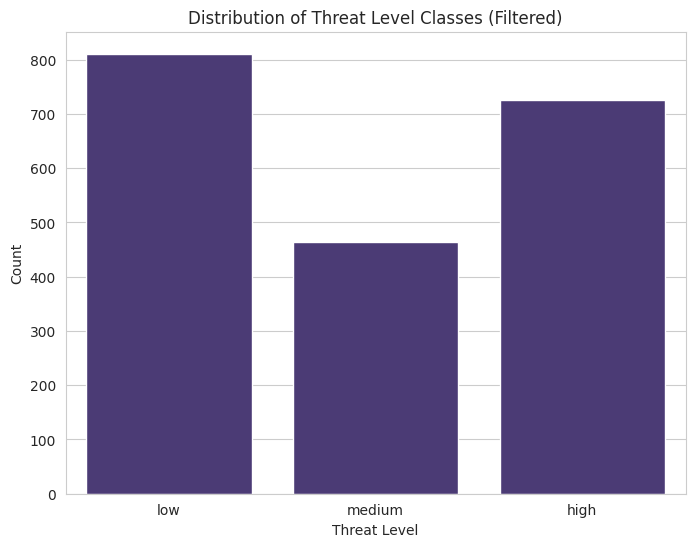


Class Counts (Filtered):
threat_level
low       811
high      725
medium    464
Name: count, dtype: int64

Class Proportions (Filtered):
threat_level
low       0.4055
high      0.3625
medium    0.2320
Name: proportion, dtype: float64


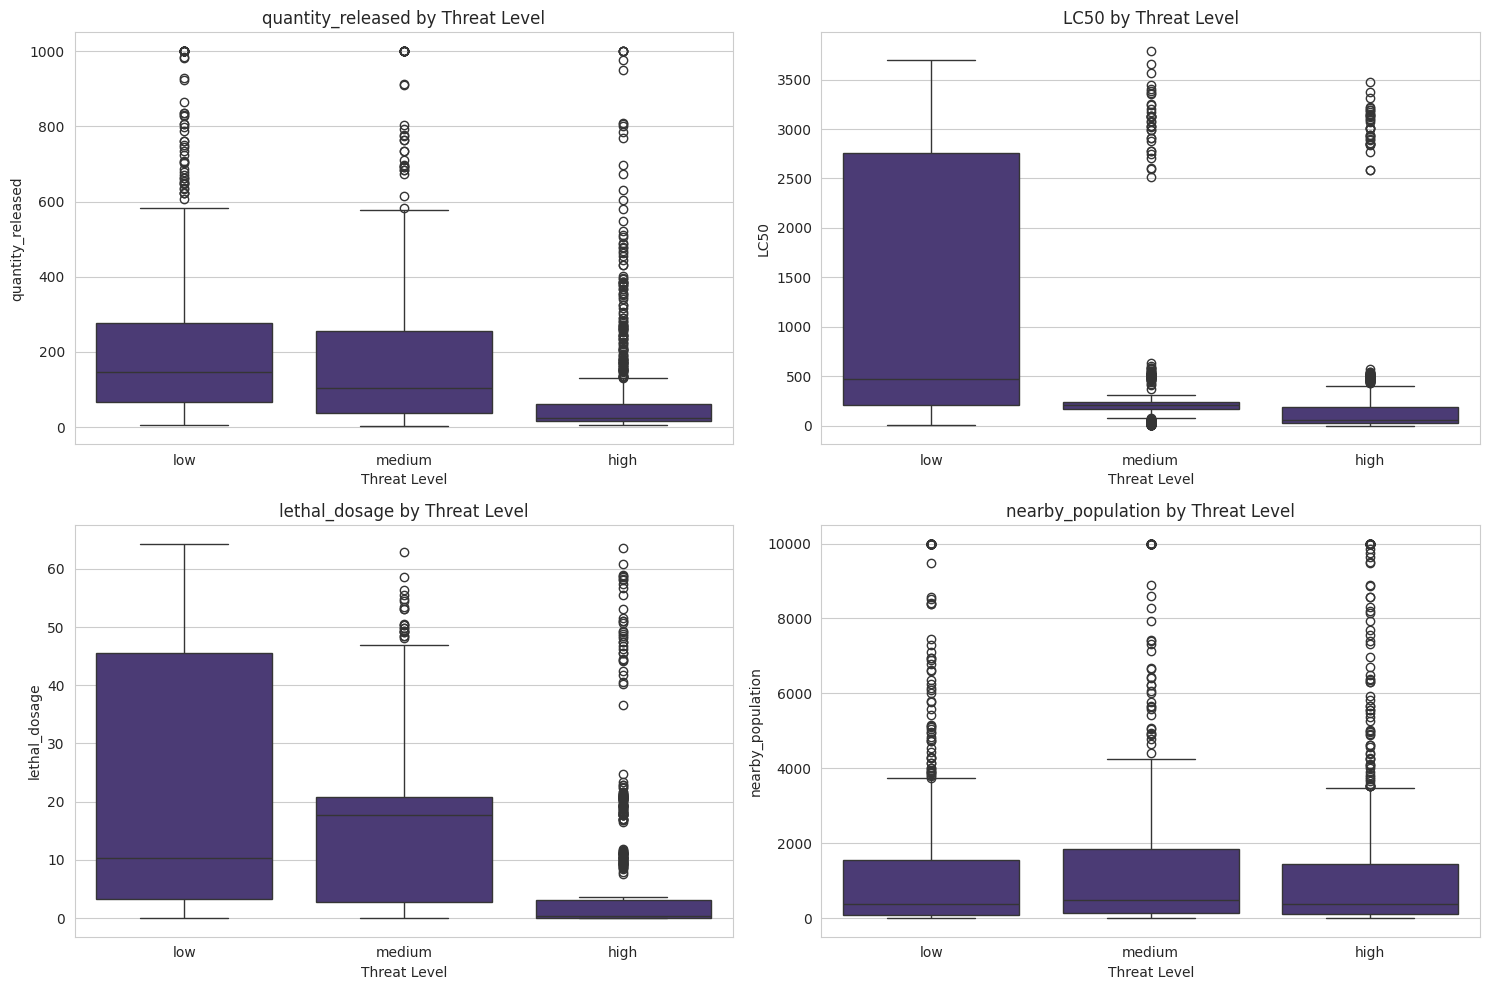


Summary Statistics by Threat Level (Filtered):

quantity_released:
              count        mean         std       min        25%         50%  \
threat_level                                                                   
high          725.0   84.443689  153.430989  4.560329  15.265159   25.326948   
low           811.0  215.294784  215.747980  6.803504  66.745298  146.423451   
medium        464.0  193.116170  232.917466  4.553134  36.524427  105.167075   

                     75%     max  
threat_level                      
high           60.993004  1000.0  
low           278.254214  1000.0  
medium        254.639022  1000.0  

LC50:
              count         mean          std       min         25%  \
threat_level                                                          
high          725.0   236.580229   632.679680  0.071515   28.720286   
low           811.0  1139.902603  1258.861159  0.091809  208.339429   
medium        464.0   408.993487   770.367049  0.077817  169.4833

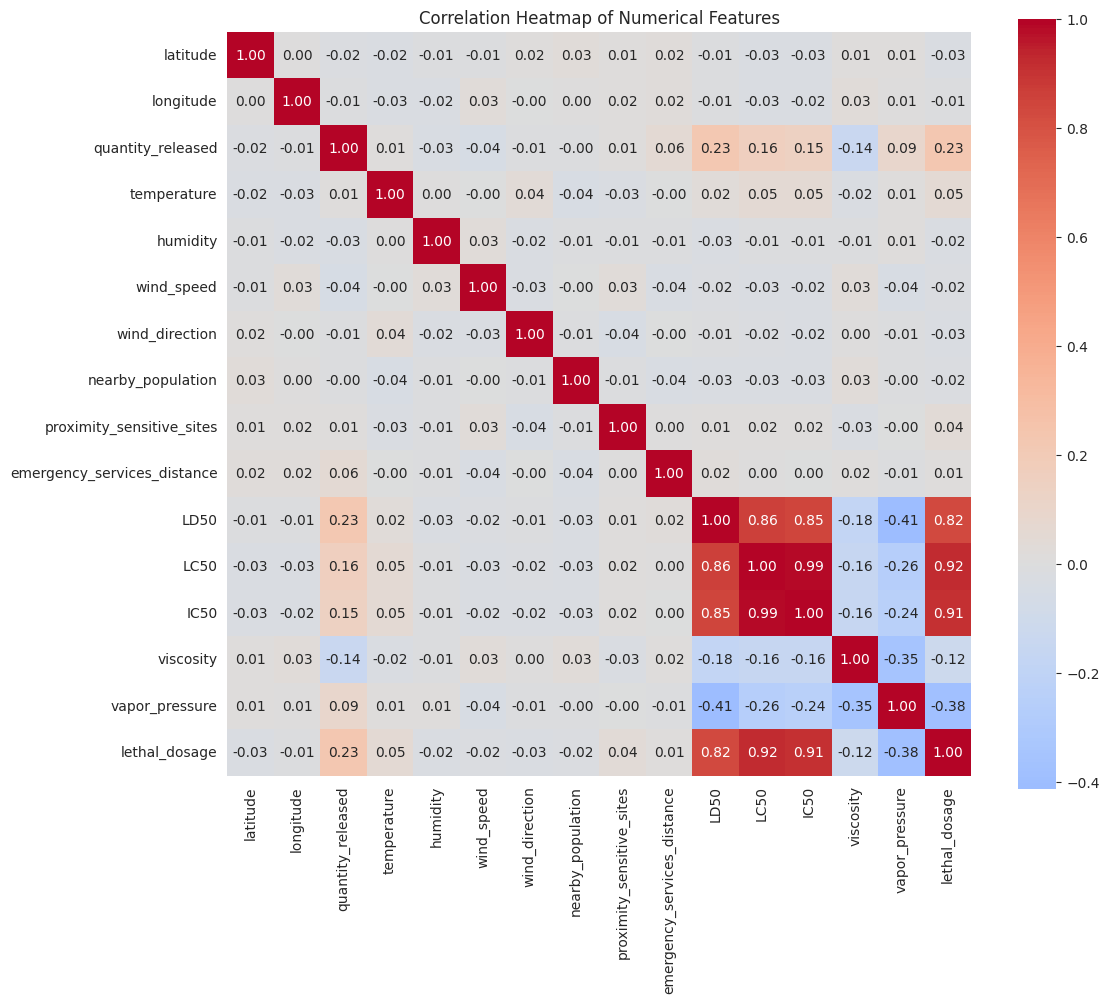

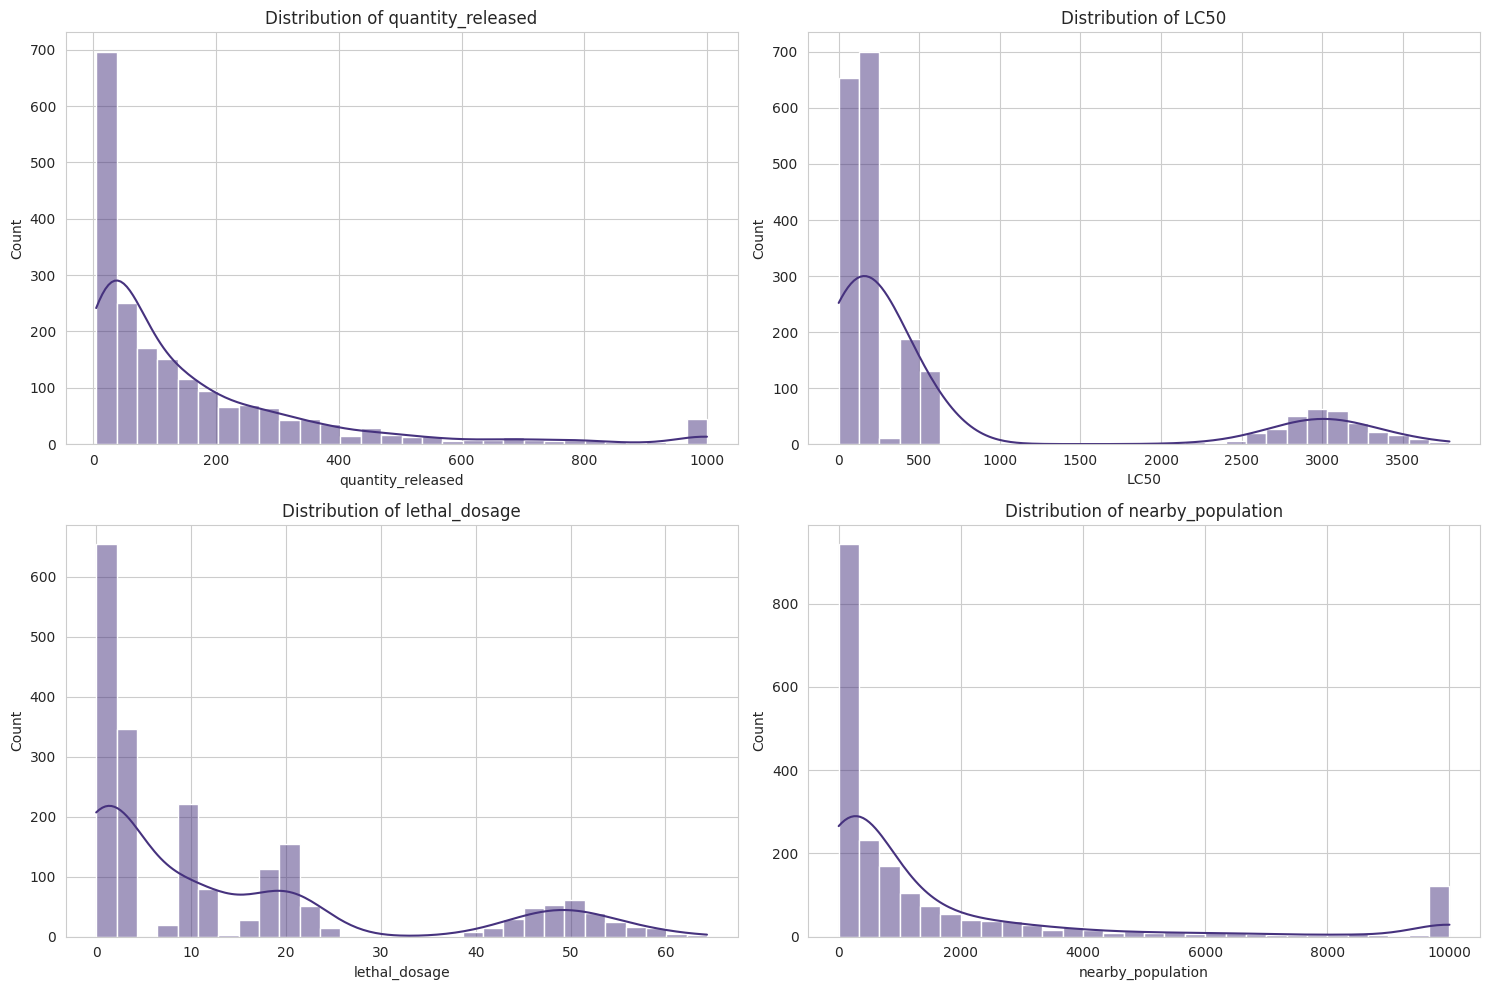

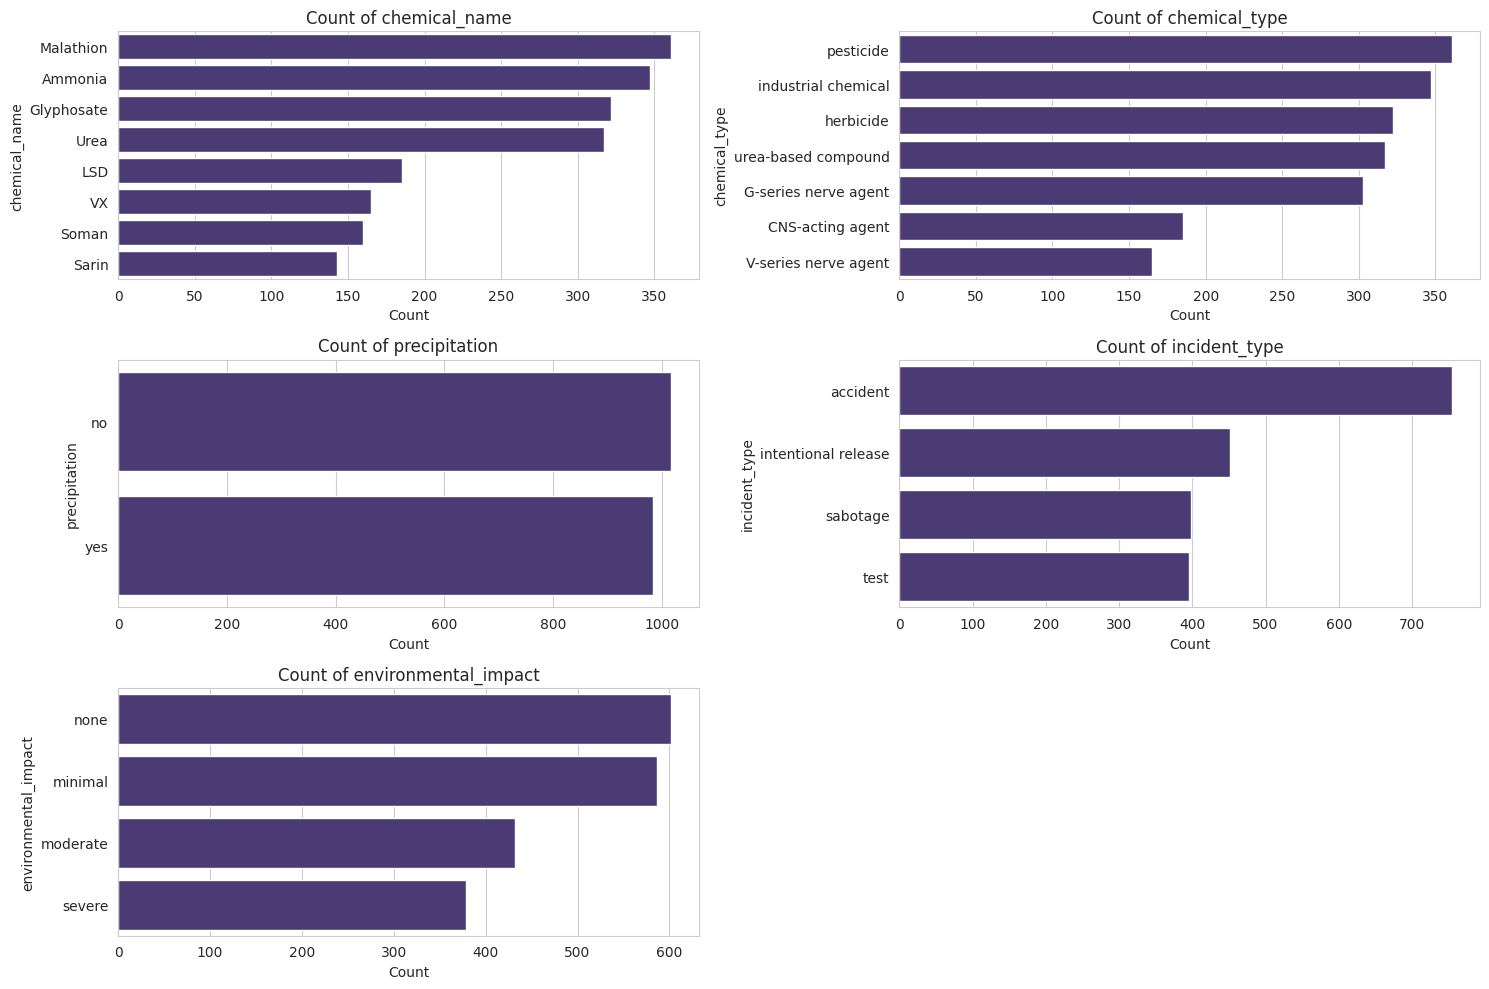


EDA complete. Visualizations saved as PNG files.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.preprocessing import LabelEncoder

# Set plot style
sns.set_style('whitegrid')
sns.set_palette("viridis")

# Load dataset
try:
    df = pd.read_csv('chemical_incidents_dataset.csv')  # Replace with your dataset path
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file 'chemical_incidents_dataset.csv' not found. Please provide the correct path.")
    exit(1)

# Load trained model for feature importance
try:
    model = joblib.load('models/threat_level_model.pkl')
    le_dict = joblib.load('models/label_encoders.pkl')
    print("Model and label encoders loaded successfully.")
except FileNotFoundError:
    print("Warning: Model files not found. Feature importance analysis will be skipped.")
    model = None

# Define feature categories
categorical_cols = ['chemical_name', 'chemical_type', 'precipitation', 'incident_type', 'environmental_impact']
numerical_cols = ['latitude', 'longitude', 'quantity_released', 'temperature', 'humidity',
                 'wind_speed', 'wind_direction', 'nearby_population', 'proximity_sensitive_sites',
                 'emergency_services_distance', 'LD50', 'LC50', 'IC50', 'viscosity', 'vapor_pressure',
                 'lethal_dosage']
target_col = 'threat_level'

# Filter DataFrame to include only desired threat levels for plotting
valid_threat_levels = ['low', 'medium', 'high']
df_filtered = df[df[target_col].isin(valid_threat_levels)].copy() # Use a copy to avoid SettingWithCopyWarning

# 1. Class Imbalance Analysis
plt.figure(figsize=(8, 6))
# Use the filtered DataFrame for plotting
sns.countplot(x=target_col, data=df_filtered, order=valid_threat_levels)
plt.title('Distribution of Threat Level Classes (Filtered)')
plt.xlabel('Threat Level')
plt.ylabel('Count')
plt.savefig('threat_level_distribution.png')
plt.show()

# Class counts and proportions (using the filtered DataFrame)
class_counts = df_filtered[target_col].value_counts()
class_proportions = df_filtered[target_col].value_counts(normalize=True)
print("\nClass Counts (Filtered):")
print(class_counts)
print("\nClass Proportions (Filtered):")
print(class_proportions)


# 2. Feature Ranges by Threat Level
key_features = ['quantity_released', 'LC50', 'lethal_dosage', 'nearby_population']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    # Use the filtered DataFrame for plotting
    sns.boxplot(x=target_col, y=feature, data=df_filtered, order=valid_threat_levels)
    plt.title(f'{feature} by Threat Level')
    plt.xlabel('Threat Level')
    plt.ylabel(feature)
plt.tight_layout()
plt.savefig('feature_ranges_by_threat_level.png')
plt.show()

# Summary statistics by threat level (using the filtered DataFrame)
print("\nSummary Statistics by Threat Level (Filtered):")
for feature in key_features:
    print(f"\n{feature}:")
    print(df_filtered.groupby(target_col)[feature].describe())


# 3. Correlation Heatmap (using the original DataFrame as it includes all data)
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()

# 4. Feature Importance (if model is available)
if model is not None:
    # Get feature names used in the model
    feature_names = model.feature_names_in_
    feature_importance = model.feature_importances_

    # Create DataFrame for importance
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance for Threat Level Prediction')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.savefig('feature_importance.png')
    plt.show()

    print("\nTop 5 Most Important Features:")
    print(importance_df.head())

# 5. Distribution of Numerical Features (using the original DataFrame)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()

# 6. Count Plots for Categorical Features (using the original DataFrame)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
plt.tight_layout()
plt.savefig('categorical_counts.png')
plt.show()

print("\nEDA complete. Visualizations saved as PNG files.")